In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 3.9MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 1.1MB 10.3MB/s 
     |████████████████████████████████| 194kB 24.5MB/s 
     |████████████████████████████████| 92kB 9.2MB/s 
     |████████████████████████████████| 40kB 5.1MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 2.6MB 29.7MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *

In [5]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from pathlib import Path
import urllib
import re
import os
import hashlib

subscription_key = "61c92dc54ef74ed5bf96131fffb3ec28"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

search_term = 'grizzly bear'
params  = {"q": search_term, "license": "public", "imageType": "photo"}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
pattern = r"(http.+)"
url_list = []
for values in search_results['value']:
  unquoted_url = urllib.parse.unquote(values['contentUrl'])
  img_url = re.search(pattern, unquoted_url)
  if img_url:
    url_list.append(img_url.group(1))

path = Path('images')
path.mkdir(parents=True)
dest = 'images/grizzly.jpg'
print(url_list[0])
download_url(url_list[0], dest, True)

https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg


In [6]:
path = Path('bears')
bear_types = 'grizzly', 'black', 'teddy'

def make_img_path(dest, url):
  file_extension = os.path.splitext(url)[-1]
  file_extension_changed = re.sub('\?.*(\S+)', '', file_extension)
  if file_extension_changed.lower() in ('.jpg', '.jpeg', '.gif', '.png', 'bmp'):
    encoded_url = url.encode('utf-8')
    hashed_url = hashlib.sha3_256(encoded_url).hexdigest()
    full_path = os.path.join(dest, hashed_url + file_extension_changed.lower())
    return full_path
  else:
    raise ValueError('Not applicable file extension')

def download_image(url, timeout=10):
  response = requests.get(url, allow_redirects=True, timeout=timeout)
  if response.status_code != 200:
    error = Exception("HTTP status: " + response.status_code)
    raise error
  content_type = response.headers["content-type"]
  if 'image' not in content_type:
    error = Exception("Content-Type: " + content_type)
    raise error
  return response.content

def save_image(filename, image):
  with open(filename, "wb") as fout:
    fout.write(image)

if not path.exists():
  path.mkdir(parents=True)
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    search_term = f'{o} bear'
    params  = {"q": search_term, "license": "public", "imageType": "photo"}
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    pattern = r"(http.+)"
    url_list = []
    for values in search_results['value']:
      unquoted_url = urllib.parse.unquote(values['contentUrl'])
      img_url = re.search(pattern, unquoted_url)
      if img_url:
        url_list.append(img_url.group(1))

    for url in url_list:
      try:
        img_path = make_img_path(dest, url)
        image = download_image(url)
        save_image(img_path, image)
        print('saved image... {}'.format(url))
      except KeyboardInterrupt:
        break
      except Exception as err:
        print("%s" % (err))


saved image... https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg
saved image... https://www.goodfreephotos.com/albums/united-states/wyoming/yellowstone-national-park/brown-bear-yellowstone-national-park-wyoming.jpg
Not applicable file extension
must be str, not int
saved image... https://get.pxhere.com/photo/bear-wildlife-zoo-mammal-fauna-brown-bear-yawn-vertebrate-tired-dormant-grizzly-bear-1068309.jpg
saved image... https://get.pxhere.com/photo/nature-animal-bear-wildlife-grizzly-wild-zoo-fur-park-brown-mammal-fauna-brown-bear-danger-vertebrate-bears-carnivore-grizzly-bear-dog-breed-group-631114.jpg
saved image... https://get.pxhere.com/photo/animal-bear-wildlife-zoo-sitting-mammal-fauna-brown-bear-vertebrate-funny-grizzly-bear-dog-breed-group-492683.jpg
saved image... https://get.pxhere.com/photo/nature-wilderness-animal-bear-wildlife-grizzly-zoo-fur-park-mammal-predator-fauna-brown-bear-wild-animal-face-whiskers-snout-head-vertebrate-switzerland-str

In [7]:
fns = get_image_files(path)
fns

(#82) [Path('bears/black/1ce1ab5d000588fa5f4408c73205adce991353acc00f27899e0915aafa26d922.jpg'),Path('bears/black/6f1ac649c3fd3fef754e4ea45f4de68f515f1f5eb0032fb329b8ddc4eee48b46.jpg'),Path('bears/black/7c559725ff70b60c337780b77ba7b87d6358ab73ba5c6d09216ad4f899a6d9f5.jpeg'),Path('bears/black/b7012386563dc6180b83bb1fbbf63493b3cbb2b7e4b0e499318ecb501db15118.jpg'),Path('bears/black/a96c3b53a96d1fde2a8ef7738ff3ff61495b91558696fa5d89c3d326909b9ffb.jpg'),Path('bears/black/fb743027ff5f308d8636b9e518788010763dd7abeb0a744643c6be8dcef24ce0.jpg'),Path('bears/black/eba998459450086c4dd50268e985f8cc3d6d3f1cd8564e10fc8ac85e3ad7a3c3.jpg'),Path('bears/black/b6e1bf6110ceab117d1a8d8c4a0424c1ca8ee756b293768c65aa2503f79278dc.jpg'),Path('bears/black/0d2d7ccb3d195794458ebe5776085ed14b9d429fb14a95b815032683acdc9341.jpg'),Path('bears/black/2d3cdcfd946dd636b1e7d5feaace54f86fd0e7b25809ead67f6a2ea2c6221d0c.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
failed.map(Path.unlink)

(#0) []

In [10]:
??verify_images

In [11]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [12]:
dls = bears.dataloaders(path)

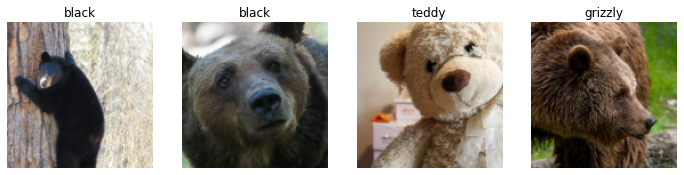

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

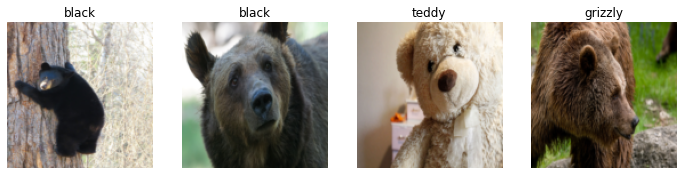

In [14]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

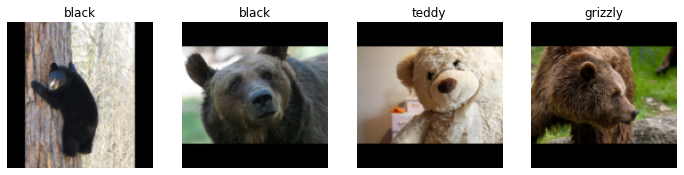

In [15]:
path = Path('bears')
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

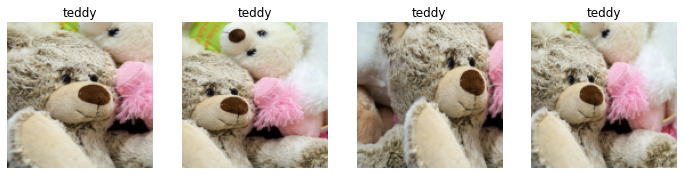

In [16]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

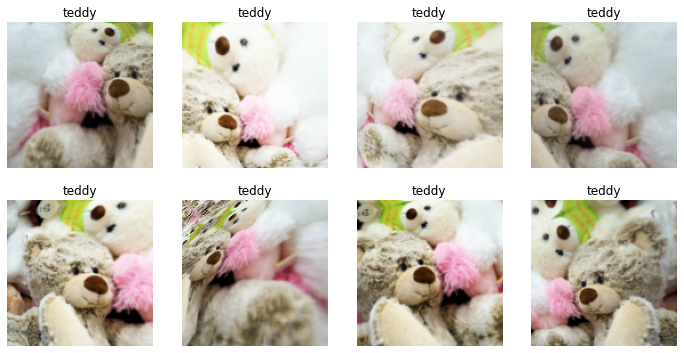

In [17]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [18]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.283791,4.964201,0.625000,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.075114,3.619029,0.562500,00:34
1,1.719585,1.511724,0.500000,00:34
2,1.319413,0.344631,0.125000,00:33
3,1.025204,0.142012,0.062500,00:34


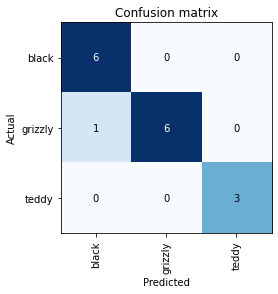

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

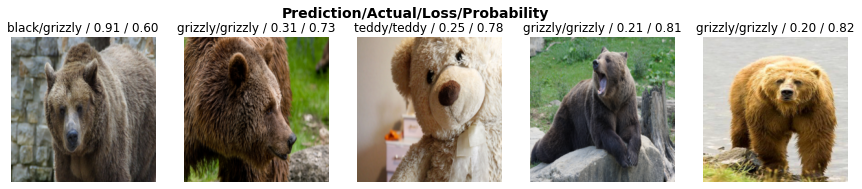

In [21]:
interp.plot_top_losses(5, nrows=1)

In [22]:
#hide_output
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [23]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [24]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorImage(1), TensorImage([1.0665e-01, 8.9274e-01, 6.0784e-04]))

In [29]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [30]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [32]:
img = PILImage.create(btn_upload.data[-1])

In [33]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [34]:
pred, pred_idx, probs = learn_inf.predict(img)

In [35]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.8927')

In [36]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
btn_upload = widgets.FileUpload()

In [39]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred
      ])